In [ ]:
##Importing Required Libraries

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [ ]:

import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic
Python 3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]
NumPy 1.21.5
SciPy 1.4.1
Scikit-Learn 1.0.2


In [ ]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [ ]:
#importing the dataset 

data=pd.read_csv('/content/grive/My Drive/final_dataset.csv')
data.head(10)
# having a glance at data 

,Unnamed: 0,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre,Top100
0,0,0.556,0.864,-5.870,0.0584,0.009580,0.000000,0.2090,0.400,105.143,5,0
1,1,0.737,0.463,-7.828,0.0792,0.008170,0.447000,0.2550,0.324,123.881,9,0
2,2,0.618,0.938,-3.442,0.0456,0.017900,0.000000,0.1670,0.875,91.455,9,0
3,3,0.331,0.943,-3.188,0.0698,0.007210,0.000002,0.2420,0.296,94.612,0,0
4,4,0.589,0.890,-3.719,0.0603,0.000481,0.000820,0.2010,0.692,90.598,5,0
5,5,0.542,0.905,-5.653,0.0540,0.001720,0.010400,0.1360,0.374,153.398,9,0
6,6,0.653,0.964,-4.261,0.0582,0.003160,0.005120,0.1440,0.870,126.928,5,0
7,7,0.618,0.938,-3.442,0.0456,0.017900,0.000000,0.1670,0.875,91.455,9,0
8,8,0.419,0.934,-3.908,0.1200,0.000278,0.001500,0.1320,0.286,127.288,5,0
9,9,0.664,0.781,-6.547,0.0339,0.001030,0.000005,0.0867,0.593,110.000,6,0


In [ ]:
data.tail(10)

,Unnamed: 0,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre,Top100
8642,9216,0.899,0.586,-7.866,0.3440,0.27900,0.00000,0.0836,0.4920,150.001,7,1
8643,9217,0.632,0.804,-6.109,0.0503,0.10100,0.00000,0.1700,0.3500,92.456,2,1
8644,9218,0.921,0.537,-5.723,0.0804,0.55600,0.00404,0.1020,0.7110,128.009,7,1
8645,9219,0.851,0.666,-5.334,0.0694,0.13900,0.00000,0.1050,0.0585,134.068,7,1
8646,9220,0.477,0.610,-5.628,0.1440,0.22500,0.00000,0.1070,0.3580,79.882,7,1
8647,9221,0.783,0.840,-3.416,0.0510,0.17400,0.00000,0.4120,0.8390,95.001,8,1
8648,9222,0.669,0.308,-10.068,0.0290,0.88300,0.00000,0.0984,0.5200,64.934,7,1
8649,9223,0.544,0.781,-6.160,0.0311,0.00585,0.00000,0.1910,0.5270,144.075,2,1
8650,9224,0.713,0.831,-4.750,0.1500,0.01680,0.00000,0.1180,0.5840,173.948,7,1
8651,9225,0.836,0.544,-5.975,0.0943,0.04030,0.00000,0.0824,0.5100,97.028,6,1


In [ ]:
# Removing unnecessary column named "Unnamed: 0"
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()
#checking whether it is droped or not!

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre,Top100
0,0.556,0.864,-5.870,0.0584,0.009580,0.000000,0.209,0.400,105.143,5,0
1,0.737,0.463,-7.828,0.0792,0.008170,0.447000,0.255,0.324,123.881,9,0
2,0.618,0.938,-3.442,0.0456,0.017900,0.000000,0.167,0.875,91.455,9,0
3,0.331,0.943,-3.188,0.0698,0.007210,0.000002,0.242,0.296,94.612,0,0
4,0.589,0.890,-3.719,0.0603,0.000481,0.000820,0.201,0.692,90.598,5,0


In [ ]:

data.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre,Top100
count,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000
mean,0.629263,0.668914,-6.899446,0.098110,0.221021,0.040536,0.181063,0.528754,121.364623,6.206657,0.173486
std,0.154437,0.202883,3.262754,0.097514,0.267346,0.150758,0.144034,0.239518,28.657971,1.834390,0.378689
min,0.061700,0.002890,-36.729000,0.022800,0.000001,0.000000,0.011900,0.024600,46.591000,0.000000,0.000000
25%,0.530000,0.535000,-8.307250,0.037000,0.017300,0.000000,0.092800,0.342000,98.523750,6.000000,0.000000
50%,0.638000,0.700000,-6.142000,0.054150,0.099850,0.000005,0.123000,0.526000,120.027500,6.000000,0.000000
75%,0.741000,0.831000,-4.696750,0.114000,0.335000,0.000778,0.228000,0.721250,139.929250,7.000000,0.000000
max,0.981000,0.997000,1.342000,0.869000,0.996000,0.982000,0.986000,0.982000,216.115000,9.000000,1.000000


In [ ]:
# Checkinng shape of dataset
data.shape

(8652, 11)

In [ ]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8652 entries, 0 to 8651
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Danceability      8652 non-null   float64
 1   Energy            8652 non-null   float64
 2   Loudness          8652 non-null   float64
 3   Speechiness       8652 non-null   float64
 4   Acousticness      8652 non-null   float64
 5   Instrumentalness  8652 non-null   float64
 6   Liveness          8652 non-null   float64
 7   Valence           8652 non-null   float64
 8   Tempo             8652 non-null   float64
 9   Genre             8652 non-null   int64  
 10  Top100            8652 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 743.7 KB
None


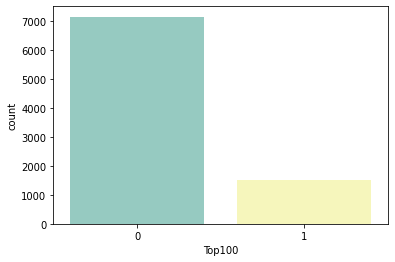

In [ ]:
# Plotting graph of Top100
sns.countplot(x="Top100",data=data,palette="Set3")

In [ ]:
data['Top100'].value_counts()

0    7151
1    1501
Name: Top100, dtype: int64

In [ ]:
# Splitting into X and y
X=data.drop("Top100",axis=1)    # excluding output column
y=data["Top100"]

In [ ]:
X

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
0,0.556,0.864,-5.870,0.0584,0.009580,0.000000,0.2090,0.400,105.143,5
1,0.737,0.463,-7.828,0.0792,0.008170,0.447000,0.2550,0.324,123.881,9
2,0.618,0.938,-3.442,0.0456,0.017900,0.000000,0.1670,0.875,91.455,9
3,0.331,0.943,-3.188,0.0698,0.007210,0.000002,0.2420,0.296,94.612,0
4,0.589,0.890,-3.719,0.0603,0.000481,0.000820,0.2010,0.692,90.598,5
...,...,...,...,...,...,...,...,...,...,...
8647,0.783,0.840,-3.416,0.0510,0.174000,0.000000,0.4120,0.839,95.001,8
8648,0.669,0.308,-10.068,0.0290,0.883000,0.000000,0.0984,0.520,64.934,7
8649,0.544,0.781,-6.160,0.0311,0.005850,0.000000,0.1910,0.527,144.075,2
8650,0.713,0.831,-4.750,0.1500,0.016800,0.000000,0.1180,0.584,173.948,7


In [ ]:
X.shape

(8652, 10)

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8647    1
8648    1
8649    1
8650    1
8651    1
Name: Top100, Length: 8652, dtype: int64

In [ ]:
y.shape

(8652,)

In [ ]:
# Applying SMOTE: to balance the dataset

from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy="minority")
X_sm,y_sm=smote.fit_resample(X,y)
X_sm.shape,y_sm.shape 

((14302, 10), (14302,))

In [ ]:
# Checking the shape again after applying smote
X_sm.shape,y_sm.shape

((14302, 10), (14302,))

In [ ]:
data.columns

Index(['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Genre', 'Top100'],
      dtype='object')

In [ ]:
column=['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Genre']
X_balance=pd.DataFrame(X_sm,columns=column)
X_balance.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
0,0.556,0.864,-5.870,0.0584,0.009580,0.000000,0.209,0.400,105.143,5
1,0.737,0.463,-7.828,0.0792,0.008170,0.447000,0.255,0.324,123.881,9
2,0.618,0.938,-3.442,0.0456,0.017900,0.000000,0.167,0.875,91.455,9
3,0.331,0.943,-3.188,0.0698,0.007210,0.000002,0.242,0.296,94.612,0
4,0.589,0.890,-3.719,0.0603,0.000481,0.000820,0.201,0.692,90.598,5


In [ ]:
X_balance.shape

(14302, 10)

In [ ]:
# MinMax scaler to scale our data , since we can see that there can be units difference
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
X_scaled=scaling.fit_transform(X_sm)

In [ ]:
column=['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Genre']
X_final=pd.DataFrame(X_scaled,columns=column)
X_final.head(2)

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
0,0.537692,0.866212,0.810564,0.042070,0.009617,0.000000,0.202341,0.392104,0.345391,0.555556
1,0.734581,0.462836,0.759134,0.066651,0.008202,0.455193,0.249564,0.312722,0.455924,1.000000


In [ ]:
X_final.shape


(14302, 10)

In [ ]:
# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X_final, y_sm, train_size = 0.8, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(11441, 10)
(2861, 10)
(11441,)
(2861,)


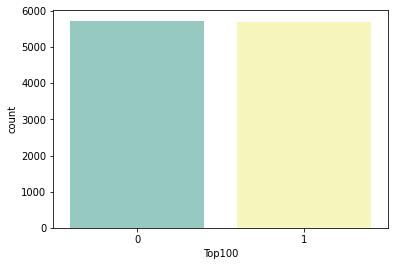

In [ ]:
#plotting graph again to check for balanced datset
ax = sns.countplot(x = y_train, palette = "Set3")

In [ ]:
# importing required libraries
from numpy import loadtxt
from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)




In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
ac

0.7448444599790283

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.65      0.72      1417
           1       0.71      0.83      0.77      1444

    accuracy                           0.74      2861
   macro avg       0.75      0.74      0.74      2861
weighted avg       0.75      0.74      0.74      2861



In [ ]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix\n\n",cm)
accuracy = float((cm.diagonal().sum())/len(y_test)*100)

Confusion Matrix

 [[ 926  491]
 [ 239 1205]]


In [ ]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred)*100)

ACCURACY OF THE MODEL:  74.48444599790282
